In [10]:
%matplotlib inline

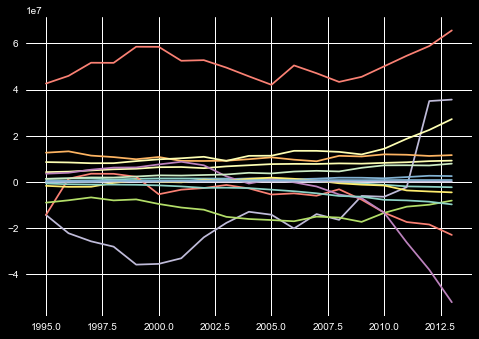

In [143]:
# data from http://ede.grid.unep.ch.com

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# loading datasets and removing rows with NA values
arrivals = pd.read_csv('arrivals.csv')
departures = pd.read_csv('departures.csv')

del arrivals['UN Code']
del departures['UN Code']
del arrivals['Arab World']
del departures['Arab World']
# we only need one subregion column so remove from departures
del departures['GEO Subregion']

arrivals = arrivals.dropna(how='any')
departures = departures.dropna(how='any')

# keeping only the relevant columns
columns = [col for col in list(arrivals) 
           if col.startswith('1') or 
           col.startswith('2') or 
           col == 'Country Name']

# merging the tables
data = pd.merge(arrivals[['GEO Subregion']+columns], departures[columns], on='Country Name', suffixes=('_a','_d'))

# summing data by subregion
data = data.groupby('GEO Subregion').sum()

# generating difference of departures - arrivals
for col in columns:
    if col == 'Country Name':
        continue
    data[col] = data[col + '_a'] - data[col + '_d']
    del data[col + '_a']
    del data[col + '_d']

# transposing data so that time periods are indexed
data = data.T

# plotting 
for label in data.columns:
    plt.plot(data.index, data[label])